Problem Statement:Servicenow optimization ticket classification using NLP

1.Here the data set we have used receives the issue in form of mail.
2.We have columns (Ticket,Address,Title,Description,Source,MA_Title,MA_Description,MA_Support_Group,MA_Mis_Assigned_Support_Group,Person,Team)
3.Ticket unique alphanumercal number assign when person raise a ticket.
4.Address of person who have raise a ticket.
5.Title is short subject of issue.
6.Description is a breif about a issue.
7.Source is email and some are blank in our dataset.
8.MA_Title and MA_Description is same as Title and Description
9.MA_Support_Group:This is our target column which has many groups to which ticket is assigned.
10.MA_Mis_Assigned_Support_Group
11.Team: To which team the person belongs to.

Target Column:'MA_Support_Group' we need to predict the group to which are ticket would be assigned.

    

In [8]:
!pip install gensim

     |████████████████████████████████| 24.2MB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 42.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/17/49/ea/74939572d8d071ff3c63a98e3e8dadef1117cc93c33efaa504
Successfully built smart-open


In [9]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 28.0MB/s eta 0:00:01
     |████████████████████████████████| 552kB 41.8MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: /home/dsxuser/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [10]:
# libraries

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')
import json
import re
import nltk
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import scipy
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import itertools


#Setup stopwords - one time download of these corpus. un comment the line to download
nltk.download('stopwords')
nltk.download('punkt')
download('wordnet')
stop = set(stopwords.words('english'))
np.set_printoptions(suppress=True,precision=10)

#Setup stemmer
ps = PorterStemmer()

#Setup lemmatizer
lmtzr = WordNetLemmatizer()
#lmtzr.lemmatize('feet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
# from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score
# from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5e8c5e7d160a4655bbd5ca5926e9add7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LaQx4XViyEiWPQ-0Dl7wAg1N0onXkil3AUEgsPLQQVg8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5e8c5e7d160a4655bbd5ca5926e9add7.get_object(Bucket='practise1-donotdelete-pr-viestgq27zkxh2',Key='MERGED_NARROW_Dedupes4.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


Ticket                    Address  \
0  SR1072495                    #blank#   
1  SR1072509  6355 Richmond Avenue East   
2  SR1072566       6897 Financial Drive   
3  SR1072642        440 Glover Road – P   
4  SR1072887            246 Main Street   

                                               Title  \
0       Job IS_SECURITY_PROJ_TICKET_APP_SM59, Step 1   
1                                Computer logged out   
2                                     Password Reset   
3                Preprocess Transactions - Urgent P2   
4  Hernando Otalora - mlaf specialists manufactur...   

                                         Description Source  \
0                                            #blank#  Email   
1  One my colleagues Nolan Tutkaluk has looged hi...  Email   
2  Hello, \r\r\rMy password has expired and I nee...  Email   
3  Good day team, \r\r\rWe need the following ord...  Email   
4  please add herrando otalora to mlaf specialist...  Email   

                                            MA_Title  \
0  SEC - Job IS_SECURITY_PROJ_TICKET_APP_SM59, St...   
1                           SD - Computer logged out   
2                                SD - Password Reset   
3           SD - Preprocess Transactions - Urgent P2   
4  SD - Hernando Otalora - mlaf specialists manuf...   

                                      MA_Description MA_Support_Group  \
0                                            #blank#         Security   
1  You can reach us at 905-285-6199 or the 1-888 ...     Service Desk   
2                               password reset done.     Service Desk   
3  Good morning, \r\r\rI see that PO is dated 230...     Service Desk   
4                                            #blank#     Service Desk   

  MA_Mis_Assigned_Support_Group             Person           Team  
0                            No          SVCBATCH.            Bot  
1                            No  Gruetzner, Oliver  Manufacturing  
2                            No    Lalonde, Daniel          Sales  
3                            No   Anderson, Stacey  Manufacturing  
4                            No  Zelinsky, Sandi V  Manufacturing

In [13]:
df=df_data_0.copy()

In [14]:
#In our target column 'MA_Support_Group' we have many group for this solution we are using few categories only and excluding othe
df = df[~df['MA_Support_Group']
    .isin(['Basic','Security','Recipe Development','HCM System Support','MFGSCP','EDI','Infrastructure Security','User Experience','CRM','Service Desk','#blank#','Communications_DO NOT USE', 'LightLife', 'ZZ Test Support Group',
           'Vendor Lenovo', 'Transportation Management', 'MDSS Conversion', 'SAP Hypercare',
           'Warehouse Management', 'Business Support Services','PMO','Quality & Food Safety','Vendor Compugen',
           'Development', 'IS Compliance', 'Technical Services', 'Basis', 'BPC',
           ])]
df = df[~df['MA_Mis_Assigned_Support_Group']
    .isin(['Yes'])]

#merging title and description together. 
df['Description'] = df['Title'].map(str) + ' ' + df['Description']

In [15]:
#Checking data
df.head()

Ticket               Address  \
8   SR1073188  6985 Financial Drive   
9   SR1073190  6985 Financial Drive   
12  SR1073527  6897 Financial Drive   
14  SR1073543  6985 Financial Drive   
19  SR1073650  6985 Financial Drive   

                                                Title  \
8                       PM - P12 BI/GL reconciliation   
9                       P12 BI/Gl Pork reconciliation   
12                              New Direction in 2017   
14             Poultry - BI/GL reconciliation for P12   
19  Request for PO:  New Hire Approved for Bell Ca...   

                                          Description Source  \
8   PM - P12 BI/GL reconciliation Hello All, \r\r\...  Email   
9   P12 BI/Gl Pork reconciliation Hello All, \r\r\...  Email   
12  New Direction in 2017 Please see below and att...  Email   
14  Poultry - BI/GL reconciliation for P12 Hello A...  Email   
19  Request for PO:  New Hire Approved for Bell Ca...  Email   

                                             MA_Title  \
8   SR1073188     FIN - PM - P12 BI/GL reconciliation   
9   SR1073190     FIN - P12 BI/Gl Pork reconciliation   
12                         CS - New Direction in 2017   
14  SR1073543     FIN - Poultry - BI/GL reconcilia...   
19  PUR - Request for PO:  New Hire Approved for B...   

                                       MA_Description  \
8                                             #blank#   
9                                             #blank#   
12  Please see below and attached: Angela Seigel w...   
14                                            #blank#   
19                                            #blank#   

                      MA_Support_Group MA_Mis_Assigned_Support_Group  \
8   Financial Reporting & Transactions                            No   
9   Financial Reporting & Transactions                            No   
12                      Client Support                            No   
14  Financial Reporting & Transactions                            No   
19                       IS Purchasing                            No   

                Person                   Team  
8    Duffield, Michael                Finance  
9    Duffield, Michael                Finance  
12  Mohammed, Sharon S      Corporate Affairs  
14   Duffield, Michael                Finance  
19         Patel, Arif  Information Solutions

In [16]:
#checking summary statistics
df.describe(include='all')

Ticket               Address  \
count        2448                  2448   
unique       2448                    59   
top     SR1018462  6985 Financial Drive   
freq            1                  1239   

                                                    Title  \
count                                                2448   
unique                                               2238   
top     NEW TICKET - NEED Person ID for Maple leaf emp...   
freq                                                   24   

                                              Description Source  \
count                                                2448   2448   
unique                                               2408      4   
top     Ransomeware Detected on Workstation, MININT-71...  Email   
freq                                                    3   2328   

                         MA_Title MA_Description MA_Support_Group  \
count                        2448           2446             2448   
unique                       2287           1174               12   
top     OM - AUTO EMAIL INVOICING        #blank#   Client Support   
freq                           22           1236              551   

       MA_Mis_Assigned_Support_Group  Person                   Team  
count                           2448    2408                   2288  
unique                             1     772                     26  
top                               No       0  Information Solutions  
freq                            2448      74                    934

In [17]:
#Checking shape
df.shape

(2448, 11)

In [18]:
#In our target column 'MA_Support_Group' checking unique values
df.MA_Support_Group.value_counts()

Client Support                        551
IS Purchasing                         514
Order Management                      347
HumanResources                        198
Operations                            192
Communications                        147
Financial Reporting & Transactions    141
Procurement                           134
SRM Business                          104
Database                               52
Licensing                              38
Business Analytics                     30
Name: MA_Support_Group, dtype: int64

In [19]:
#Converting target column to categories by cat,codes
df['target'] = df.MA_Support_Group.astype('category').cat.codes

In [20]:
#checking Data type of ours columns
df.dtypes

Ticket                           object
Address                          object
Title                            object
Description                      object
Source                           object
MA_Title                         object
MA_Description                   object
MA_Support_Group                 object
MA_Mis_Assigned_Support_Group    object
Person                           object
Team                             object
target                             int8
dtype: object

In [21]:
#calculating number of words in description column
df['num_words'] = df.Description.apply(lambda x : len(x.split()))

In [22]:
#Bining them and checking word distribution 
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [23]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [24]:
word_distribution.head()

bins  counts
0    0-100    1303
1  100-300     688
2  300-500     286
3  500-800     171
4     >800       0

Text(0.5, 1.0, 'Word distribution per bin')

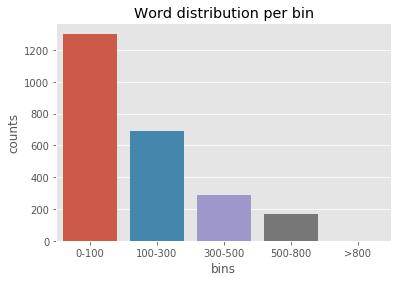

In [25]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [26]:
#we will preprocess data removing contractions,normalizing and scrubing our text data

# Data Preprocessing and cleaning our data

## Defining the functions to perform basic steps like 

- **expanding contractions**
 
- **remove accented characters**

- **scrub words**

In [27]:
df['Description'][:1]

8    PM - P12 BI/GL reconciliation Hello All, \r\r\...
Name: Description, dtype: object

In [28]:
# creating dictionary for contractions so that we can replace in our data
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [29]:
#defing function for contractions
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

## Invoking the expand_contractions functions

In [30]:
df['Description'] = [expand_contractions(re.sub('’', "'", text)) for text in df['Description']]
df['Description'][:10]

8     PM - P12 BI/GL reconciliation Hello All, \r\r\...
9     P12 BI/Gl Pork reconciliation Hello All, \r\r\...
12    New Direction in 2017 Please see below and att...
14    Poultry - BI/GL reconciliation for P12 Hello A...
19    Request for PO:  New Hire Approved for Bell Ca...
20    Laptop T430 battery replacement request  Lapto...
23    Material Group MRO Parts Hello, \r\r\rThe mate...
25    Farm Fresh - External set up for invoices- acc...
39    restore file Hello, \r\r\rI accidently over-wr...
41    Jim Boyd Meat Brokerage - email invoices reque...
Name: Description, dtype: object

In [31]:
#defining function for accented to normalize our text
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [32]:
# df['Description'][:10]

## Invoking the remove_accented_chars functions

In [33]:
df['Description'][:10] = [remove_accented_chars(text) for text in df['Description'][:10]]
df['Description'][:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


8     PM - P12 BI/GL reconciliation Hello All, \r\r\...
9     P12 BI/Gl Pork reconciliation Hello All, \r\r\...
12    New Direction in 2017 Please see below and att...
14    Poultry - BI/GL reconciliation for P12 Hello A...
19    Request for PO:  New Hire Approved for Bell Ca...
20    Laptop T430 battery replacement request  Lapto...
23    Material Group MRO Parts Hello, \r\r\rThe mate...
25    Farm Fresh - External set up for invoices- acc...
39    restore file Hello, \r\r\rI accidently over-wr...
41    Jim Boyd Meat Brokerage - email invoices reque...
Name: Description, dtype: object

In [34]:
#cleaning our text with scrub function with help of regex
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

## Invoking the above defined functions

In [35]:
df['Description']= [scrub_words(text) for text in df['Description']]
df['Description'][:10]

8     PM P BI GL reconciliation Hello All Please see...
9     P BI Gl Pork reconciliation Hello All Please s...
12    New Direction in Please see below and attached...
14    Poultry BI GL reconciliation for P Hello All P...
19    Request for PO New Hire Approved for Bell Cana...
20    Laptop T battery replacement request Laptop T ...
23    Material Group MRO Parts Hello The material gr...
25    Farm Fresh External set up for invoices accoun...
39    restore file Hello I accidently over wrote an ...
41    Jim Boyd Meat Brokerage email invoices request...
Name: Description, dtype: object

In [36]:
reindexed_data= df["Description"]

data_text = df[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

#finally removing stopword and performing stemming and lemmatization operation by defining their function

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

2448
                                          Description  index
8   PM P BI GL reconciliation Hello All Please see...      8
9   P BI Gl Pork reconciliation Hello All Please s...      9
12  New Direction in Please see below and attached...     12
14  Poultry BI GL reconciliation for P Hello All P...     14
19  Request for PO New Hire Approved for Bell Cana...     19


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
#calling a lemmatize function
processed_docs= [lemmatize_stemming(text) for text in documents['Description']]
documents['Description'][:10]

8     PM P BI GL reconciliation Hello All Please see...
9     P BI Gl Pork reconciliation Hello All Please s...
12    New Direction in Please see below and attached...
14    Poultry BI GL reconciliation for P Hello All P...
19    Request for PO New Hire Approved for Bell Cana...
20    Laptop T battery replacement request Laptop T ...
23    Material Group MRO Parts Hello The material gr...
25    Farm Fresh External set up for invoices accoun...
39    restore file Hello I accidently over wrote an ...
41    Jim Boyd Meat Brokerage email invoices request...
Name: Description, dtype: object

In [38]:
#calling our preprocessing function
processed_docs= [preprocess(text) for text in documents['Description']]
documents['Description'][:10]

8     PM P BI GL reconciliation Hello All Please see...
9     P BI Gl Pork reconciliation Hello All Please s...
12    New Direction in Please see below and attached...
14    Poultry BI GL reconciliation for P Hello All P...
19    Request for PO New Hire Approved for Bell Cana...
20    Laptop T battery replacement request Laptop T ...
23    Material Group MRO Parts Hello The material gr...
25    Farm Fresh External set up for invoices accoun...
39    restore file Hello I accidently over wrote an ...
41    Jim Boyd Meat Brokerage email invoices request...
Name: Description, dtype: object

In [39]:
#creating bag of word and take count of frequency of occurance
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 account
1 analyst
2 area
3 attach
4 cash
5 cog
6 differ
7 discount
8 duffield
9 financi
10 follow


In [40]:
#Filtering and removing the word which occure less than 15 times
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(34, 1),
 (50, 1),
 (61, 2),
 (63, 4),
 (76, 4),
 (77, 1),
 (80, 2),
 (84, 2),
 (135, 1),
 (239, 2),
 (300, 1),
 (310, 4),
 (365, 1),
 (430, 6),
 (564, 1),
 (586, 1),
 (657, 5),
 (791, 1),
 (813, 1),
 (821, 2),
 (822, 1),
 (875, 1),
 (876, 2)]

In [41]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 34 ("attent") appears 1 time.
Word 50 ("email") appears 1 time.
Word 61 ("januari") appears 2 time.
Word 63 ("laptop") appears 4 time.
Word 76 ("send") appears 4 time.
Word 77 ("servic") appears 1 time.
Word 80 ("subject") appears 2 time.
Word 84 ("thursday") appears 2 time.
Word 135 ("issu") appears 1 time.
Word 239 ("ticket") appears 2 time.
Word 300 ("desk") appears 1 time.
Word 310 ("open") appears 4 time.
Word 365 ("data") appears 1 time.
Word 430 ("outlook") appears 6 time.
Word 564 ("tell") appears 1 time.
Word 586 ("chain") appears 1 time.
Word 657 ("wieb") appears 5 time.
Word 791 ("folder") appears 1 time.
Word 813 ("local") appears 1 time.
Word 821 ("jonathan") appears 2 time.
Word 822 ("microsoft") appears 1 time.
Word 875 ("okay") appears 1 time.
Word 876 ("smartphon") appears 2 time.


In [42]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.10352467369483981),
 (1, 0.06994584173471785),
 (2, 0.2051113177908611),
 (3, 0.07497662638680909),
 (4, 0.2326184077692979),
 (5, 0.2291209815278087),
 (6, 0.16366586546894318),
 (7, 0.24954527635824525),
 (8, 0.2521039280845811),
 (9, 0.10275908407288961),
 (10, 0.07830152576418987),
 (11, 0.23636585573688726),
 (12, 0.17622466396278388),
 (13, 0.08511382126735186),
 (14, 0.21075568053139496),
 (15, 0.09566151883066096),
 (16, 0.18278846421319445),
 (17, 0.18566271543396004),
 (18, 0.2576292397916574),
 (19, 0.19029295260453968),
 (20, 0.41684908615649663),
 (21, 0.20842454307824831),
 (22, 0.1380556902634509),
 (23, 0.16270360071477843),
 (24, 0.16984263844451142),
 (25, 0.17500502858055578),
 (26, 0.14272720045609402)]


In [43]:
#Building LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=2)

In [44]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=8, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.031*"send" + 0.027*"subject" + 0.023*"prezio" + 0.023*"fran" + 0.020*"craig"'), (1, '0.027*"send" + 0.024*"subject" + 0.024*"prezio" + 0.022*"fran" + 0.018*"purchas"'), (2, '0.040*"email" + 0.026*"send" + 0.023*"invoic" + 0.022*"custom" + 0.021*"auto"'), (3, '0.021*"send" + 0.017*"inform" + 0.016*"access" + 0.015*"email" + 0.015*"threat"'), (4, '0.026*"approv" + 0.021*"request" + 0.017*"send" + 0.015*"cost" + 0.014*"consult"'), (5, '0.022*"send" + 0.015*"subject" + 0.013*"email" + 0.011*"issu" + 0.011*"offic"'), (6, '0.024*"subject" + 0.024*"send" + 0.019*"bell" + 0.013*"need" + 0.011*"custom"'), (7, '0.027*"email" + 0.020*"send" + 0.019*"approv" + 0.019*"subject" + 0.017*"request"')]
Topic: 0 
Words: 0.031*"send" + 0.027*"subject" + 0.023*"prezio" + 0.023*"fran" + 0.020*"craig" + 0.020*"quot" + 0.020*"approv" + 0.018*"purchas" + 0.017*"email" + 0.011*"invoic"
Topic: 1 
Words: 0.027*"send" + 0.024*"subject" + 0.024*"prezio" + 0.022*"fran" + 0.018*"purchas" + 0.011*"quot" + 0.01

In [45]:
# Here we will some visualization and see overall distribution of our topics

In [46]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Building ML Models

In [47]:
#Diving data into train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df[['Description','Team']], df['MA_Support_Group'],
                                                    test_size=0.2)

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(1958, 2)
(1958,)
(490,)


In [49]:


#creating tfidfvector object and fit the data
vectorizer = TfidfVectorizer(ngram_range=(1,1),sublinear_tf=True)
X = vectorizer.fit_transform(X_train['Description'].apply(str))
#Label enconding for our target column
le = preprocessing.LabelEncoder()
le.fit(df['MA_Support_Group'].unique())
y = le.transform(Y_train.tolist())



#fit the model
clf = svm.SVC(kernel='linear', C=3, probability=True).fit(X,y)

##test###
#x
Xt = vectorizer.transform(X_test['Description'].apply(str))
#y
yt = le.transform(Y_test.tolist())
#pred
predictedt = clf.predict(Xt)

In [50]:
#Trying Random forest Classifier
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
model, pred_train, pred_test = model_building(X, y,Xt, clf)

In [52]:
#calling a evaluate function
model_evaluation(y, pred_train,yt, pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       450
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00       114
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00       405
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       275
          10       1.00      1.00      1.00       106
          11       1.00      1.00      1.00        79

   micro avg       1.00      1.00      1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958

-----------f1_macro_score---------
1.0

               CLASSIFICATION REPORT FOR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

# Creating other modeles and parameter tuning for same

In [53]:
#Creating list of estimators withsome parameter tuning
estimators = [(AdaBoostClassifier(), {'n_estimators' : [100, 150, 200], 
                                      'learning_rate' : [0.1, 0.5, 0.9]}), 
              (RandomForestClassifier(), {'n_estimators' : [10, 25, 50, 75, 100], 
                                          'max_depth' : [10, 12, 14, 16, 18, 20], 
                                          'min_samples_leaf' : [5, 10, 15, 20]}), 
              (RandomForestClassifier(), {'n_estimators' : [10, 25, 50, 75, 100], 
                                          'max_depth' : [10, 12, 14, 16, 18, 20], 
                                          'min_samples_leaf' : [5, 10, 15, 20], 
                                          'class_weight' : ['balanced']}),
              (GradientBoostingClassifier(), {'n_estimators' : [100,150,200,250], 
                                              'max_depth' : [5, 10], 
                                              'learning_rate' : [0.1,0.5,0.9]}), 
              (XGBClassifier(), {'colsample_bytree': [0.5, 0.6, 0.7], 
                                 'n_estimators':[100, 200], 
                                 'max_depth': [10, 15, 20, 25]})]

In [54]:
#Function to build a model and fit it

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [55]:
#function to evaluate a model
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, pred_train))
    print('-----------f1_macro_score---------')
    print(f1_score(y_train, pred_train, average="macro"))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))
    print('-----------f1_macro_score---------')
    print(f1_score(y_test, pred_test, average="macro"))

In [ ]:
#Running for loop with all are estimators
for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X, y,
                                                            Xt, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y, pred_train, yt, pred_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


			 AdaBoostClassifier 

{'learning_rate': 0.5, 'n_estimators': 200} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        26
           1       0.50      0.94      0.65       450
           2       0.81      0.40      0.54       120
           3       1.00      0.32      0.48        41
           4       0.83      0.31      0.45       114
           5       0.95      0.76      0.84       152
           6       0.91      0.84      0.87       405
           7       0.62      0.17      0.26        30
           8       0.51      0.41      0.46       160
           9       0.87      0.71      0.78       275
          10       0.82      0.58      0.68       106
          11       0.78      0.41      0.53        79

   micro avg       0.69      0.69      0.69      1958
   macro avg       0.77      0.52      0.58      1958
weighted avg       0.75      0.69      0.68      1958

--------

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

			 RandomForestClassifier 

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 75} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.53      0.99      0.69       450
           2       0.98      0.47      0.63       120
           3       0.94      0.41      0.58        41
           4       0.98      0.54      0.69       114
           5       1.00      0.83      0.91       152
           6       0.94      0.96      0.95       405
           7       0.00      0.00      0.00        30
           8       0.97      0.57      0.72       160
           9       0.99      0.86      0.92       275
          10       0.97      0.73      0.83       106
          11       1.00      0.48      0.65        79

   micro avg       0.78      0.78      0.78      1958
   macro avg       0.78      0.57      0.63      1958
weighted avg       0.84      0.78      0.7

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

			 RandomForestClassifier 

{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100} 



               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        26
           1       0.91      0.74      0.81       450
           2       0.84      0.90      0.87       120
           3       0.71      1.00      0.83        41
           4       0.83      0.92      0.87       114
           5       0.79      0.91      0.85       152
           6       0.98      0.95      0.97       405
           7       0.36      1.00      0.53        30
           8       0.95      0.80      0.87       160
           9       0.95      0.88      0.91       275
          10       0.84      0.82      0.83       106
          11       0.78      0.96      0.86        79

   micro avg       0.87      0.87      0.87      1958
   macro avg       0.80      0.90      0.83      1958
weighted avg 

Normalized confusion matrix
[[0.5  0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.02 0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.19 0.74 0.   0.   0.   0.   0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.82 0.   0.   0.   0.   0.18 0.   0.   0.  ]
 [0.04 0.11 0.   0.   0.81 0.   0.   0.   0.   0.04 0.   0.  ]
 [0.   0.07 0.   0.   0.   0.93 0.   0.   0.   0.   0.   0.  ]
 [0.   0.03 0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.  ]
 [0.   0.75 0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.09 0.03 0.03 0.06 0.   0.   0.   0.78 0.   0.   0.  ]
 [0.   0.01 0.   0.   0.06 0.   0.   0.   0.   0.93 0.   0.  ]
 [0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.11 0.71 0.14]
 [0.   0.12 0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.84]]


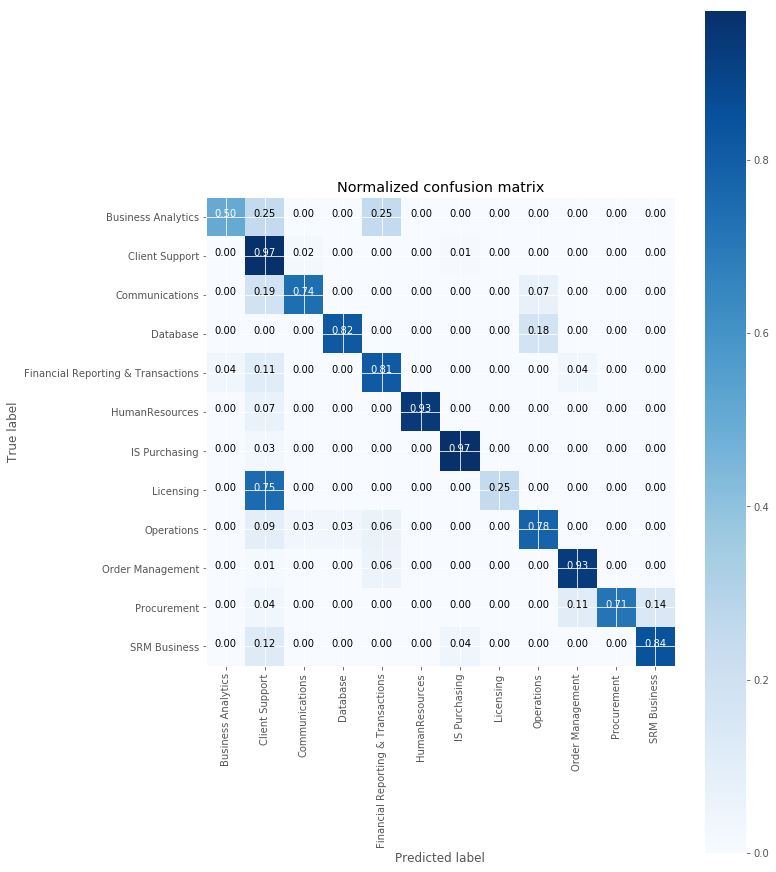

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.77      0.97      0.86       101
           2       0.87      0.74      0.80        27
           3       0.90      0.82      0.86        11
           4       0.76      0.81      0.79        27
           5       1.00      0.93      0.97        46
           6       0.98      0.97      0.98       109
           7       1.00      0.25      0.40         8
           8       0.86      0.78      0.82        32
           9       0.94      0.93      0.94        72
          10       1.00      0.71      0.83        28
          11       0.84      0.84      0.84        25

   micro avg       0.89      0.89      0.89       490
   macro avg       0.88      0.77      0.80       490
weighted avg       0.90      0.89      0.88       490

F1 weighted:  0.8847396393787477 F1 micro 0.8877551020408163 F1 macro 0.8039378249011356


In [42]:

##confusion matrix, P , R ,F1###################
cm = confusion_matrix(yt, predictedt)
class_names = pd.DataFrame(dict(c1=df['MA_Support_Group'].unique(),
                  c2=le.transform(df['MA_Support_Group'].unique())))
class_names = class_names.sort_values(['c2'])['c1'].tolist()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(10.5, 15.5, forward=True)

np.set_printoptions(precision=2)
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()
print(classification_report(yt, predictedt))
print('F1 weighted: ', f1_score(yt, predictedt, average='weighted'), 'F1 micro', f1_score(yt, predictedt, average='micro'), 'F1 macro',
      f1_score(yt, predictedt, average='macro'))

In [43]:

##--testing out the model casually#############
#Test Case #1 - Should return Licensing Team
str_new = 'I need a license for MS Project Pro'
docs_new = [lmtzr.lemmatize(word) for word in str_new.split()]
docs_new = [ps.stem(word) for word in docs_new]
docs_new = [' '.join(docs_new)]
vecDoc = vectorizer.transform(docs_new)
Yhat = clf.predict(vecDoc)
print (list(le.inverse_transform(Yhat)))

#Test Case #2 - Should return the IS Purchasing team
str_new = 'Hi , create a PO to purchase some power adapters and a new monitor'
docs_new = [lmtzr.lemmatize(word) for word in str_new.split()]
docs_new = [ps.stem(word) for word in docs_new]
docs_new = [' '.join(docs_new)]
vecDoc = vectorizer.transform(docs_new)
Yhat = clf.predict(vecDoc)
print (list(le.inverse_transform(Yhat)))

#Test Case #3 - Should return the  Support Team
str_new = 'Hi, there is an issue with our ECR workflow not going to the product development team'
docs_new = [lmtzr.lemmatize(word) for word in str_new.split()]
docs_new = [ps.stem(word) for word in docs_new]
docs_new = [' '.join(docs_new)]
vecDoc = vectorizer.transform(docs_new)
Yhat = clf.predict(vecDoc)
print (list(le.inverse_transform(Yhat)))

['Licensing']
['IS Purchasing']
['Client Support']


In [44]:
#Taking unique count of words in description

In [100]:
unique_elements, counts_elements = np.unique(df['Description'].apply(len),return_counts=True)

In [101]:
#calculating maximum text lenght
max_text_count_length = list(counts_elements).index(max(counts_elements))

print(max_text_count_length)
TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
TEXT_MAX_SEQUENCE_LENGTH

282


348

In [102]:
df.head()

Ticket               Address  \
8   SR1073188  6985 Financial Drive   
9   SR1073190  6985 Financial Drive   
12  SR1073527  6897 Financial Drive   
14  SR1073543  6985 Financial Drive   
19  SR1073650  6985 Financial Drive   

                                                Title  \
8                       PM - P12 BI/GL reconciliation   
9                       P12 BI/Gl Pork reconciliation   
12                              New Direction in 2017   
14             Poultry - BI/GL reconciliation for P12   
19  Request for PO:  New Hire Approved for Bell Ca...   

                                          Description Source  \
8   PM P BI GL reconciliation Hello All Please see...  Email   
9   P BI Gl Pork reconciliation Hello All Please s...  Email   
12  New Direction in Please see below and attached...  Email   
14  Poultry BI GL reconciliation for P Hello All P...  Email   
19  Request for PO New Hire Approved for Bell Cana...  Email   

                                             MA_Title  \
8   SR1073188     FIN - PM - P12 BI/GL reconciliation   
9   SR1073190     FIN - P12 BI/Gl Pork reconciliation   
12                         CS - New Direction in 2017   
14  SR1073543     FIN - Poultry - BI/GL reconcilia...   
19  PUR - Request for PO:  New Hire Approved for B...   

                                       MA_Description  \
8                                             #blank#   
9                                             #blank#   
12  Please see below and attached: Angela Seigel w...   
14                                            #blank#   
19                                            #blank#   

                      MA_Support_Group MA_Mis_Assigned_Support_Group  \
8   Financial Reporting & Transactions                            No   
9   Financial Reporting & Transactions                            No   
12                      Client Support                            No   
14  Financial Reporting & Transactions                            No   
19                       IS Purchasing                            No   

                Person                   Team  target  num_words     bins  
8    Duffield, Michael                Finance       4         60    0-100  
9    Duffield, Michael                Finance       4         48    0-100  
12  Mohammed, Sharon S      Corporate Affairs       1        422  300-500  
14   Duffield, Michael                Finance       4         40    0-100  
19         Patel, Arif  Information Solutions       6        411  300-500

In [103]:
#defining target attribute
target=['MA_Support_Group']

In [104]:
#defining source attribute
source=['Description']

In [105]:
#defing train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df[source], df[target], test_size=0.25,random_state=42)

In [106]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
df['MA_Support_Group'].unique()

array(['Financial Reporting & Transactions', 'Client Support',
       'IS Purchasing', 'Procurement', 'Order Management', 'Operations',
       'Communications', 'HumanResources', 'Business Analytics',
       'SRM Business', 'Licensing', 'Database'], dtype=object)

In [108]:
#taking number of unique elements in target column
no_of_levels=len(df['MA_Support_Group'].unique())

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
#object of onehotencoding
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [111]:
#fitting object
OneHotEncoder = onehotencoder.fit(Y_train.values.reshape(-1, 1))

In [112]:
#transforming the target
OneHotEncoder_target_train = OneHotEncoder.transform(Y_train.values.reshape(-1, 1)).toarray()
OneHotEncoder_target_test = OneHotEncoder.transform(Y_test.values.reshape(-1, 1)).toarray()

In [113]:

OneHotEncoder_target_test.shape

(612, 12)

In [114]:
#creating tokenize object
tokenizer = Tokenizer(oov_token='None')
#fitting on text
tokenizer.fit_on_texts(X_train['Description'])
#converting token to sequence
text_train = tokenizer.texts_to_sequences(X_train['Description'])
text_test = tokenizer.texts_to_sequences(X_test['Description'])

#checking length of words
word_index_review_text = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_review_text))
NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

print(TEXT_MAX_SEQUENCE_LENGTH)
review_text_seq_train = pad_sequences(text_train, maxlen=TEXT_MAX_SEQUENCE_LENGTH)
print(text_test)
review_text_seq_test = pad_sequences(text_test, maxlen=TEXT_MAX_SEQUENCE_LENGTH)

Found 10924 unique tokens.
348
[[1322, 2121, 1944, 7, 19, 71, 558, 1825, 11, 124, 8, 51, 9, 73, 33, 3, 5, 204, 74, 27, 245, 260, 281, 16, 18, 20, 66, 7, 55, 204, 54, 104, 136, 32, 245, 260, 281, 4, 2, 248, 142, 10, 1146, 2720, 4, 115, 90, 1146, 2720, 4, 115, 13, 95, 174, 23, 3, 2721, 2722, 2723, 4, 115, 15, 1322, 2121, 1944, 7, 19, 71, 558, 1825, 2121, 4084, 7, 457, 275, 7, 19, 71, 558, 11, 523, 1322, 3, 644, 21, 173], [232, 19, 1, 163, 11, 119, 5, 232, 34, 125, 159, 702, 3, 2546, 5, 205, 4534, 19, 5, 692, 14, 4878, 11, 216, 8, 51], [3348, 1499, 1, 5687, 93, 2043, 1605, 61, 1, 25, 11, 98, 8, 82, 37, 6, 204, 74, 11, 1, 1499, 10, 1, 3, 112, 3, 121, 9588, 1084, 34, 62, 1211, 558, 5, 706, 979, 1050, 350, 381, 48, 93, 7, 86, 874, 48, 7, 19, 2428, 24, 5, 22, 14, 1653, 444, 45, 14, 1009, 40, 49, 38, 1796, 59, 12, 1763, 40, 49, 38, 105, 173, 419, 160, 193, 122, 36, 160, 193, 122, 211, 131, 12, 49, 38, 1343, 112, 1, 710, 148, 14, 36, 1079, 5, 74, 105, 838, 27, 755, 10, 422, 350, 381, 13, 91, 13

# Building Neural Net

In [115]:
#creating input having shape calcualted before 
text_input= Input(shape=(TEXT_MAX_SEQUENCE_LENGTH,),name='text_input')

#Embedding the layer
text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,trainable=True)(text_input)
#Flatten the embedded layer
text_output = Flatten()(text_embed)

Instructions for updating:
Colocations handled automatically by placer.


In [116]:
#Creating dense layer of model
X = Dense(8, activation='relu')(text_output)
final_out = Dense(no_of_levels, activation='softmax')(X)

In [117]:
#creating model object
model = Model(inputs=[text_input], outputs=final_out)

In [118]:
#Archicture of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      (None, 348)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 348, 50)           546250    
_________________________________________________________________
flatten_1 (Flatten)          (None, 17400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 139208    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                108       
Total params: 685,566
Trainable params: 685,566
Non-trainable params: 0
_________________________________________________________________


In [119]:
#compiling our model
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [124]:
#fitting model on train data
#Creating history to save performance of model with epoch 
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit([review_text_seq_train], 
          y=OneHotEncoder_target_train, 
          epochs=10,validation_split=0.20)

Train on 1468 samples, validate on 368 samples
Epoch 1/10
1468/1468 [==============================] - 1s 438us/step - loss: 0.0409 - acc: 0.9966 - val_loss: 0.9595 - val_acc: 0.7663
Epoch 2/10
1468/1468 [==============================] - 1s 460us/step - loss: 0.0376 - acc: 0.9973 - val_loss: 0.9733 - val_acc: 0.7609
Epoch 3/10
1468/1468 [==============================] - 1s 434us/step - loss: 0.0348 - acc: 0.9973 - val_loss: 0.9615 - val_acc: 0.7636
Epoch 4/10
1468/1468 [==============================] - 1s 431us/step - loss: 0.0322 - acc: 0.9973 - val_loss: 0.9707 - val_acc: 0.7582
Epoch 5/10
1468/1468 [==============================] - 1s 425us/step - loss: 0.0301 - acc: 0.9973 - val_loss: 0.9647 - val_acc: 0.7636
Epoch 6/10
1468/1468 [==============================] - 1s 435us/step - loss: 0.0280 - acc: 0.9973 - val_loss: 0.9822 - val_acc: 0.7582
Epoch 7/10
1468/1468 [==============================] - 1s 626us/step - loss: 0.0262 - acc: 0.9980 - val_loss: 0.9677 - val_acc: 0.7636
E

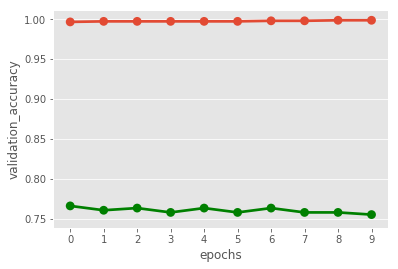

In [125]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [126]:
# In above diagram we can see that model is overfitting ,our train set accuracy is 0.99 and validation set  0.73

In [127]:
#Will build model in such a way to generalize on the data and reduce overfitting

In [128]:
# Deep Learning Model Simple

In [129]:
#We will initalize all the layers and predict on that
inputs = Input(shape=(TEXT_MAX_SEQUENCE_LENGTH, ))
embedding_layer = Embedding(NUM_WORDS_REVIEW_TEXT,
                            128,
                            input_length=TEXT_MAX_SEQUENCE_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(no_of_levels, activation='softmax')(x)
model_sm = Model(inputs=[inputs], outputs=predictions)
model_sm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_sm.fit([review_text_seq_train], y=OneHotEncoder_target_train, batch_size=64,  verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      (None, 348)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 348, 50)           546250    
_________________________________________________________________
flatten_1 (Flatten)          (None, 17400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 139208    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                108       
Total params: 685,566
Trainable params: 685,566
Non-trainable params: 0
_________________________________________________________________
Train on 1377 samples, validate on 459 samples
Epoch 1/10
1377/1377 [==============================] - 2s 2ms/step - loss: 2.1972 - acc:

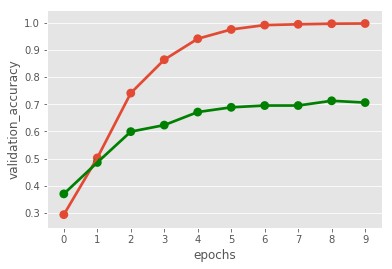

In [130]:
#ploting the above model
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [131]:
#In above figure we can see train accuracy is also gradually increasing with number of epoch,but their is some amount of overfitting

In [132]:
# In model introducing lstm layer 

In [133]:
inputs = Input(shape=(TEXT_MAX_SEQUENCE_LENGTH, ))
embedding_layer = Embedding(NUM_WORDS_REVIEW_TEXT,
                            128,
                            input_length=TEXT_MAX_SEQUENCE_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(no_of_levels, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 348)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 348, 128)          1398400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                396       
Total params: 1,450,284
Trainable params: 1,450,284
Non-trainable params: 0
_________________________________________________________________


In [134]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit(review_text_seq_train, batch_size=64, y=OneHotEncoder_target_train, verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

Train on 1377 samples, validate on 459 samples
Epoch 1/20
1377/1377 [==============================] - 47s 34ms/step - loss: 2.4177 - acc: 0.2382 - val_loss: 2.2168 - val_acc: 0.2353

Epoch 00001: val_acc improved from -inf to 0.23529, saving model to weights.hdf5
Epoch 2/20
1377/1377 [==============================] - 43s 31ms/step - loss: 2.1298 - acc: 0.3145 - val_loss: 2.0131 - val_acc: 0.3072

Epoch 00002: val_acc improved from 0.23529 to 0.30719, saving model to weights.hdf5
Epoch 3/20
1377/1377 [==============================] - 45s 32ms/step - loss: 1.7036 - acc: 0.4379 - val_loss: 1.9701 - val_acc: 0.3312

Epoch 00003: val_acc improved from 0.30719 to 0.33115, saving model to weights.hdf5
Epoch 4/20
1377/1377 [==============================] - 45s 32ms/step - loss: 1.4713 - acc: 0.4975 - val_loss: 1.5853 - val_acc: 0.4815

Epoch 00004: val_acc improved from 0.33115 to 0.48148, saving model to weights.hdf5
Epoch 5/20
1377/1377 [==============================] - 44s 32ms/step - 

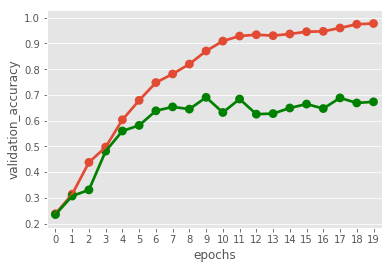

In [135]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [136]:
#By adding lstm layer even thought test accuracy is not increased , but overfitting is reduced 

In [137]:
#Predicting on our test data
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(review_text_seq_test)
predicted = np.argmax(predicted, axis=1)

In [138]:
OneHotEncoder_target_test[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [139]:
Actual_labels=np.argmax(OneHotEncoder_target_test, axis=1)
Actual_labels[1]

1

In [142]:
from sklearn.metrics import classification_report,accuracy_score

print(accuracy_score(Actual_labels, predicted))
print(classification_report(Actual_labels, predicted))

0.6895424836601307
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.66      0.80      0.72       135
           2       0.59      0.54      0.57        35
           3       0.00      0.00      0.00        13
           4       0.58      0.53      0.55        40
           5       0.53      0.84      0.65        45
           6       0.79      0.87      0.83       125
           7       0.00      0.00      0.00        10
           8       0.65      0.62      0.63        53
           9       0.93      0.80      0.86        87
          10       0.44      0.23      0.30        35
          11       0.62      0.62      0.62        26

   micro avg       0.69      0.69      0.69       612
   macro avg       0.48      0.49      0.48       612
weighted avg       0.66      0.69      0.67       612



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#on our test data accuracy is 0.68

In [ ]:
#Adding lstm and dropout layers to reduce overfitting

In [143]:
inputs = Input(shape=(TEXT_MAX_SEQUENCE_LENGTH, ))
embedding_layer =Embedding(NUM_WORDS_REVIEW_TEXT,
                    128,
                    input_length=TEXT_MAX_SEQUENCE_LENGTH
                    )(inputs)
x=LSTM(256,return_sequences=True)(embedding_layer)
x=Dropout(0.4)(x)
x=LSTM(128)(x)
x=Dropout(0.4)(x)

predictions = Dense(no_of_levels, activation='softmax')(x)
model_lstm_dropout = Model(inputs=[inputs], outputs=predictions)
model_lstm_dropout.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

model_lstm_dropout.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 348)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 348, 128)          1398400   
_________________________________________________________________
lstm_2 (LSTM)                (None, 348, 256)          394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 348, 256)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [144]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm_dropout.fit(review_text_seq_train, batch_size=64, y=OneHotEncoder_target_train, verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

Train on 1377 samples, validate on 459 samples
Epoch 1/20
1377/1377 [==============================] - 122s 89ms/step - loss: 2.3110 - acc: 0.2280 - val_loss: 2.0319 - val_acc: 0.2353

Epoch 00001: val_acc improved from -inf to 0.23529, saving model to weights.hdf5
Epoch 2/20
1377/1377 [==============================] - 121s 88ms/step - loss: 1.8800 - acc: 0.3980 - val_loss: 1.7258 - val_acc: 0.4379

Epoch 00002: val_acc improved from 0.23529 to 0.43791, saving model to weights.hdf5
Epoch 3/20
1377/1377 [==============================] - 118s 86ms/step - loss: 1.4024 - acc: 0.5744 - val_loss: 1.5484 - val_acc: 0.4924

Epoch 00003: val_acc improved from 0.43791 to 0.49237, saving model to weights.hdf5
Epoch 4/20
1377/1377 [==============================] - 121s 88ms/step - loss: 1.0059 - acc: 0.6783 - val_loss: 1.3822 - val_acc: 0.6253

Epoch 00004: val_acc improved from 0.49237 to 0.62527, saving model to weights.hdf5
Epoch 5/20
1377/1377 [==============================] - 111s 81ms/st

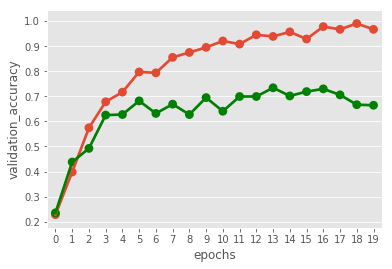

In [145]:
df = pd.DataFrame({'epochs':history.epoch, 
                   'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [146]:
#Their some increase in our validation set accuracty to 0.74, but their still overfitting

In [147]:
model_lstm_dropout.load_weights('weights.hdf5')
predicted1= model_lstm_dropout.predict(review_text_seq_test)
predicted1= np.argmax(predicted1, axis=1)

In [148]:
OneHotEncoder_target_test[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [149]:
Actual_labels=np.argmax(OneHotEncoder_target_test, axis=1)
Actual_labels[1]

1

In [150]:
from sklearn.metrics import classification_report
print(accuracy_score(Actual_labels, predicted1))
print(classification_report(Actual_labels, predicted1))

0.7401960784313726
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.74      0.79      0.76       135
           2       0.63      0.63      0.63        35
           3       0.28      0.38      0.32        13
           4       0.76      0.62      0.68        40
           5       0.86      0.82      0.84        45
           6       0.80      0.82      0.81       125
           7       0.18      0.20      0.19        10
           8       0.74      0.74      0.74        53
           9       0.84      0.91      0.87        87
          10       0.68      0.43      0.53        35
          11       0.61      0.65      0.63        26

   micro avg       0.74      0.74      0.74       612
   macro avg       0.68      0.60      0.62       612
weighted avg       0.75      0.74      0.74       612



In [151]:
#On the test data accuracy we have acheive till now is 0.74
#we can add more layers and address our overfitting probelem and increase our accuracy.

# Future Scope

In [152]:
#We can do feature engineering and use other features to build our model
#Can enhance model performance by using transfer learning 

In [ ]:
#deployment

In [53]:
api_key = 'teuonH42NK9fs-h2kbKROGBHhiirxc6tFhyXQ7eIOcgg'
location = 'https://us-south.ml.cloud.ibm.com'

In [54]:
wml_credentials = {
    "apikey": api_key,
    "url":  location 
}

In [55]:
!pip install -U ibm-watson-machine-learning

Requirement already up-to-date: ibm-watson-machine-learning in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.0.10)


In [56]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

In [57]:
!pip install -U ibm-watson-machine-learning

from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

Requirement already up-to-date: ibm-watson-machine-learning in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.0.10)


In [58]:
space_id ='f6f6501f-c8e1-4c4f-9c65-59ecafdcc386'

In [59]:
client.spaces.list(limit=10)

------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
f6f6501f-c8e1-4c4f-9c65-59ecafdcc386  lticiti-hackathon-space  2020-09-05T19:00:04.389Z
------------------------------------  -----------------------  ------------------------


In [60]:
client.set.default_space(space_id)


'SUCCESS'

In [61]:
sofware_spec_uid = client.software_specifications.get_id_by_name("scikit-learn_0.20-py3.6")

In [62]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Scikit model',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.20',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=clf,
    meta_props=metadata,
    training_data=X_train,
    training_target=Y_train)

In [63]:
import json

published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "label_column": "MA_Support_Group",
    "software_spec": {
      "id": "09c5a1d0-9c1e-4473-a344-eb7b665ff687",
      "name": "scikit-learn_0.20-py3.6"
    },
    "training_data_references": [
      {
        "connection": {
          "access_key_id": "not_applicable",
          "endpoint_url": "not_applicable",
          "secret_access_key": "not_applicable"
        },
        "id": "1",
        "location": {},
        "schema": {
          "fields": [
            {
              "name": "Description",
              "type": "object"
            },
            {
              "name": "Team",
              "type": "object"
            }
          ],
          "id": "1",
          "type": "DataFrame"
        },
        "type": "s3"
      }
    ],
    "type": "scikit-learn_0.20"
  },
  "metadata": {
    "created_at": "2020-09-06T10:42:41.261Z",
    "id": "902a0eb8-3419-4c42-92d6-4a8dac0103f7",
    "modified_at": "2020-09-06T10:42:43.124Z",
    "name": "Scikit model",
  

In [64]:
models_details = client.repository.list_models()

------------------------------------  ----------------------------------------------------------------  ------------------------  -----------------
ID                                    NAME                                                              CREATED                   TYPE
902a0eb8-3419-4c42-92d6-4a8dac0103f7  Scikit model                                                      2020-09-06T10:42:41.002Z  scikit-learn_0.20
eaf64ba8-8d14-4639-8aa4-033e3a3f88e1  TicketCategoryClassifier                                          2020-09-06T10:39:07.002Z  scikit-learn_0.22
9c5d6444-4821-4d30-88f4-f79b49a90684  Bank marketing (sample) - P1 GradientBoostingClassifierEstimator  2020-09-06T08:47:03.002Z  wml-hybrid_0.1
78cc678d-f4cd-4994-99ac-3a583cc9ff71  Trade Settlement Regression model                                 2020-09-06T07:57:54.002Z  scikit-learn_0.22
aa048935-56ca-440d-8a5d-acb011b64c10  Housing Loan - P2 XGBClassifierEstimator                          2020-09-05T20:18:03.002Z

In [65]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '902a0eb8-3419-4c42-92d6-4a8dac0103f7' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='57c78281-d7a6-4d01-9bb1-c494750235ac'
------------------------------------------------------------------------------------------------




In [66]:
deployment_uid = client.deployments.get_uid(created_deployment)

In [67]:
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/ml/v4/deployments/57c78281-d7a6-4d01-9bb1-c494750235ac/predictions


In [68]:
client.deployments.list()

------------------------------------  -----------------------------------  -----  ------------------------
GUID                                  NAME                                 STATE  CREATED
7faa31c0-7fa2-41d2-b0da-b93a685c3d95  TicketCategoryClassifier Deployment  ready  2020-09-06T10:44:02.347Z
57c78281-d7a6-4d01-9bb1-c494750235ac  Deployment of scikit model           ready  2020-09-06T10:42:49.837Z
84db4037-f9d1-45ab-9496-d6abd312a8f6  Deployment of regression model       ready  2020-09-06T09:40:18.703Z
------------------------------------  -----------------------------------  -----  ------------------------


In [69]:
client.deployments.get_details(deployment_uid)

{'entity': {'asset': {'id': '902a0eb8-3419-4c42-92d6-4a8dac0103f7'},
  'custom': {},
  'hardware_spec': {'id': 'Not_Applicable', 'name': 'S', 'num_nodes': 1},
  'name': 'Deployment of scikit model',
  'online': {},
  'space_id': 'f6f6501f-c8e1-4c4f-9c65-59ecafdcc386',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/57c78281-d7a6-4d01-9bb1-c494750235ac/predictions'},
   'state': 'ready'}},
 'metadata': {'created_at': '2020-09-06T10:42:49.837Z',
  'id': '57c78281-d7a6-4d01-9bb1-c494750235ac',
  'modified_at': '2020-09-06T10:42:49.837Z',
  'name': 'Deployment of scikit model',
  'owner': 'IBMid-550002GNQJ',
  'space_id': 'f6f6501f-c8e1-4c4f-9c65-59ecafdcc386'}}

In [ ]:
# prediction_list=list(le.inverse_transform(predictedt))

In [79]:
prediction_list=predictedt.tolist()

In [80]:
print(json.dumps(prediction_list, indent=2))

[
  1,
  6,
  1,
  8,
  4,
  6,
  5,
  1,
  2,
  2,
  1,
  6,
  9,
  1,
  9,
  1,
  6,
  4,
  4,
  1,
  2,
  9,
  9,
  11,
  1,
  8,
  1,
  5,
  8,
  9,
  9,
  1,
  6,
  5,
  4,
  11,
  6,
  6,
  5,
  1,
  1,
  5,
  1,
  5,
  1,
  1,
  1,
  1,
  1,
  2,
  9,
  1,
  4,
  8,
  6,
  9,
  4,
  1,
  9,
  10,
  4,
  9,
  5,
  9,
  1,
  2,
  6,
  10,
  10,
  1,
  1,
  11,
  2,
  6,
  1,
  4,
  6,
  1,
  8,
  5,
  2,
  1,
  4,
  9,
  2,
  6,
  10,
  6,
  8,
  6,
  6,
  8,
  9,
  1,
  6,
  5,
  5,
  6,
  9,
  6,
  6,
  6,
  1,
  9,
  9,
  6,
  5,
  11,
  11,
  9,
  11,
  5,
  1,
  6,
  9,
  9,
  1,
  6,
  9,
  6,
  6,
  3,
  3,
  4,
  2,
  5,
  9,
  5,
  6,
  10,
  1,
  8,
  3,
  1,
  6,
  4,
  6,
  10,
  6,
  4,
  6,
  9,
  5,
  6,
  6,
  4,
  11,
  1,
  8,
  6,
  1,
  1,
  8,
  6,
  1,
  2,
  6,
  5,
  1,
  4,
  4,
  1,
  1,
  1,
  5,
  6,
  10,
  8,
  9,
  6,
  9,
  6,
  9,
  3,
  11,
  1,
  6,
  4,
  8,
  11,
  11,
  6,
  9,
  10,
  2,
  1,
  6,
  5,
  6,
  6,
  9,
  9,
  6,
  5,
  1,
  6,
